In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [15]:
df=pd.read_csv('Nav_date_modified.csv')
df.replace(' ','_',regex=True,inplace=True)
df.columns=df.columns.str.replace(' ','_')
df['Date_Valued'] = pd.to_datetime(df['Date_Valued'],format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9088 entries, 0 to 9087
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Scheme_Name                  9088 non-null   object        
 1   Net_Asset_Value              9088 non-null   object        
 2   Outstanding_Number_of_Units  9088 non-null   object        
 3   Nav_Per_Unit                 9088 non-null   float64       
 4   Sale_Price_per_Unit          9088 non-null   float64       
 5   Repurchase_Price/Unit        9088 non-null   float64       
 6   Date_Valued                  9088 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 497.1+ KB


In [16]:
df['Scheme_Name'].unique()

array(['Umoja_Fund', 'Wekeza_Maisha_Fund', 'Watoto_Fund', 'Jikimu_Fund',
       'Liquid_Fund', 'Bond_Fund'], dtype=object)

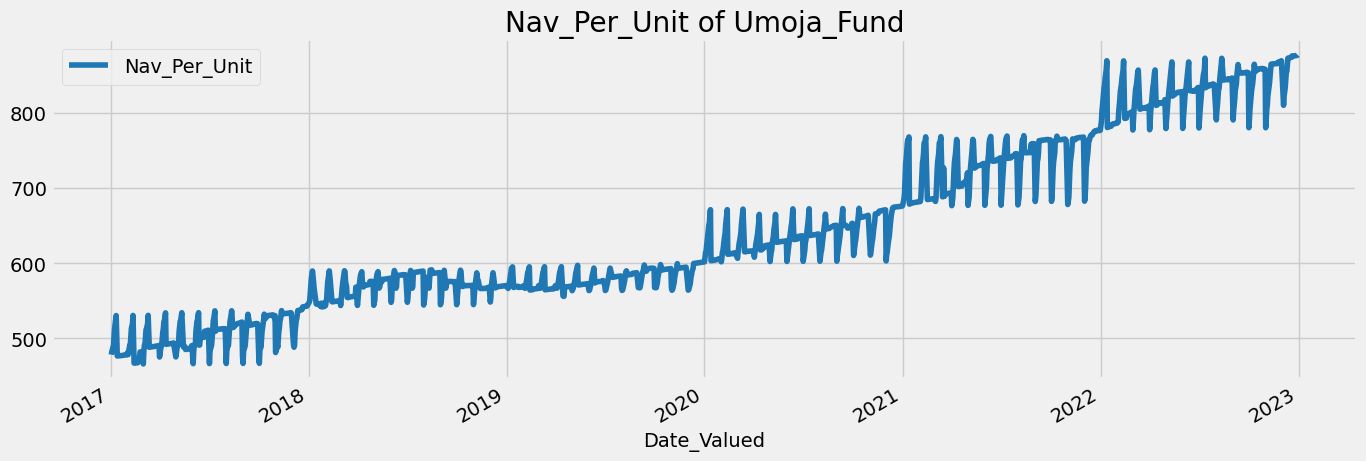

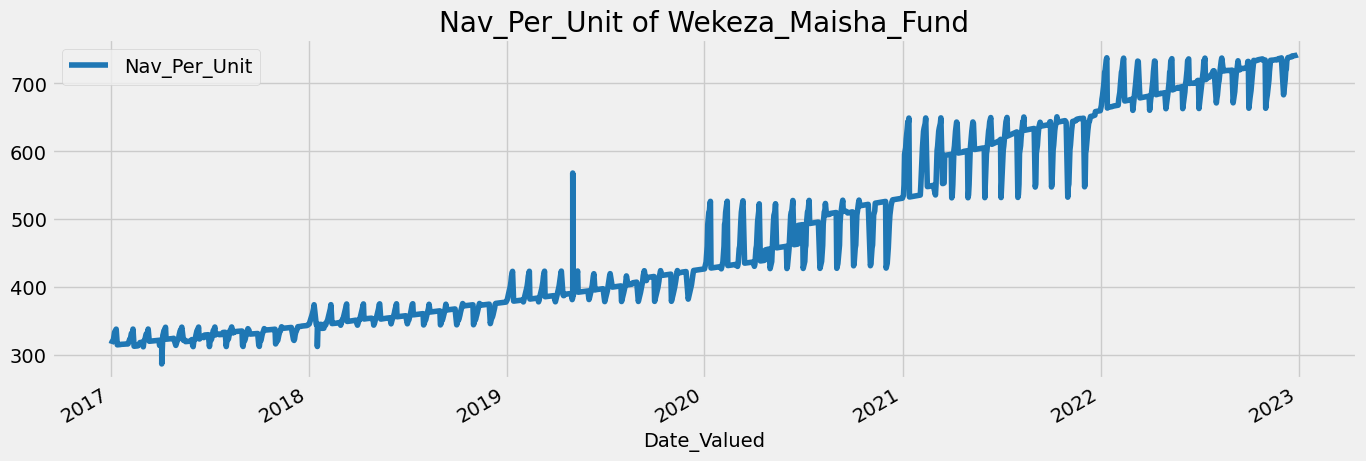

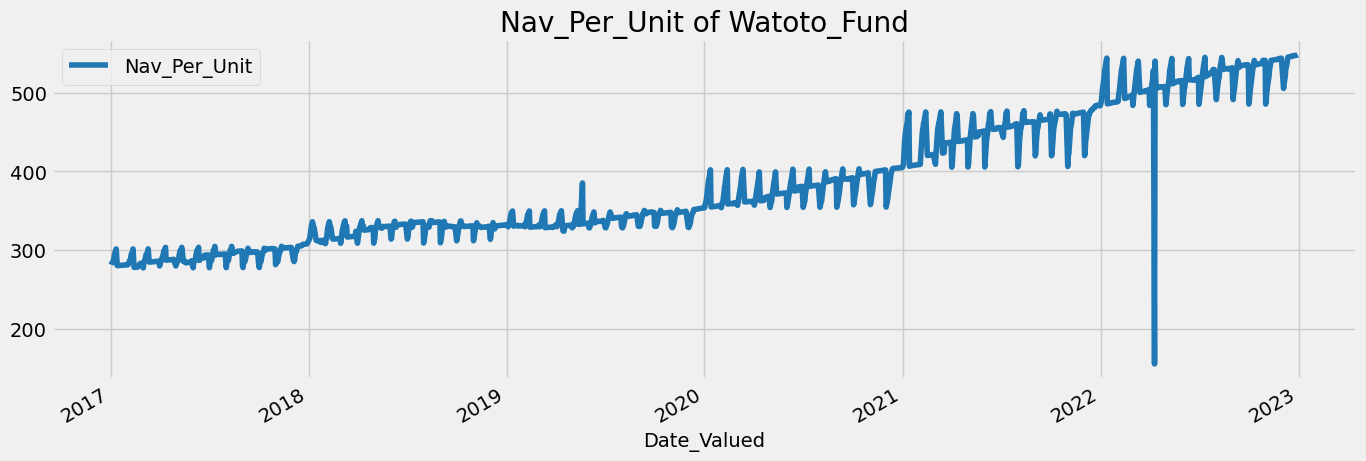

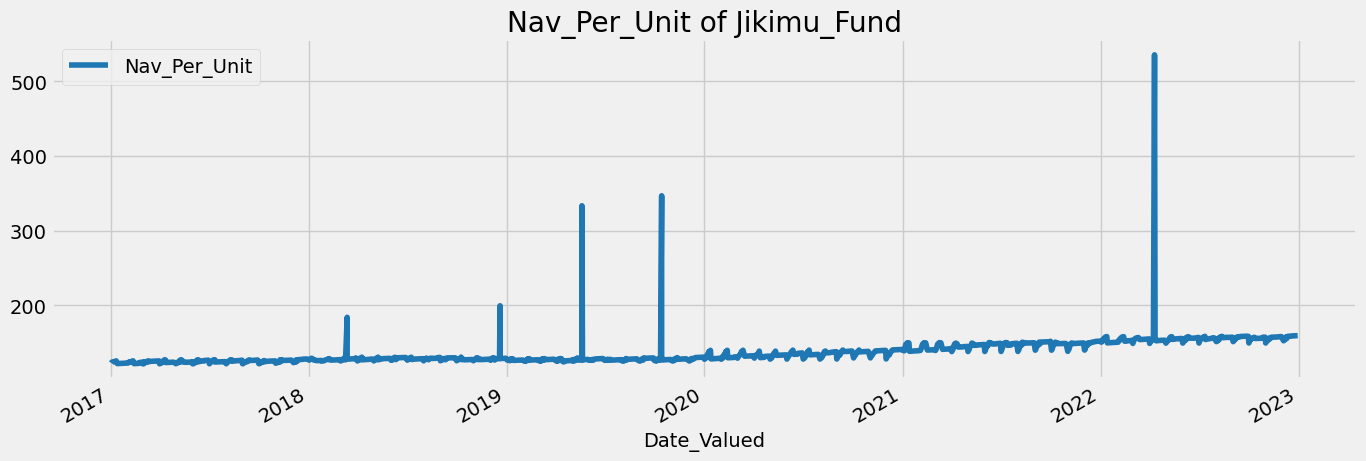

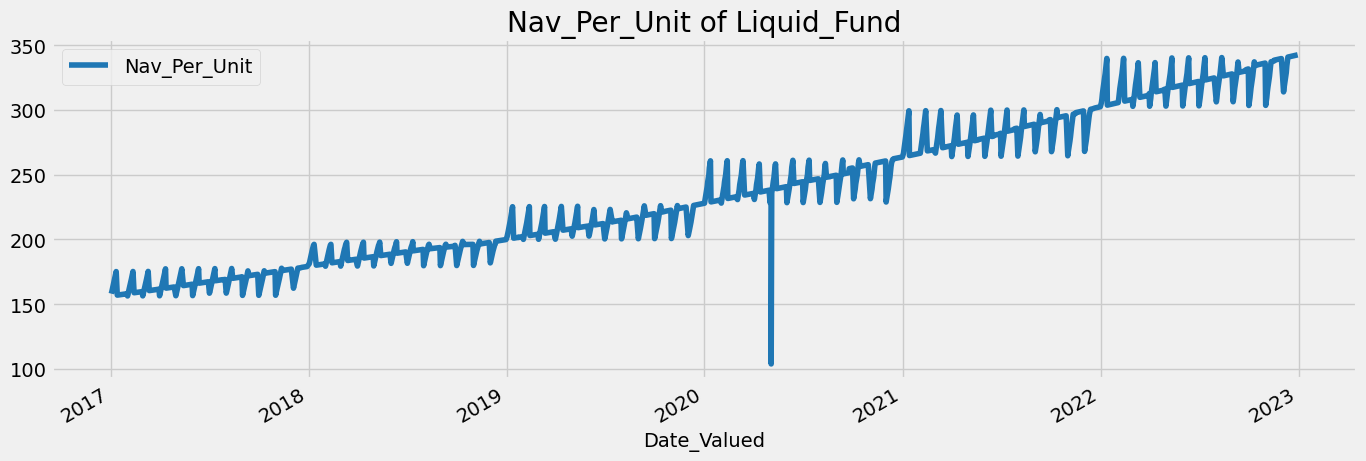

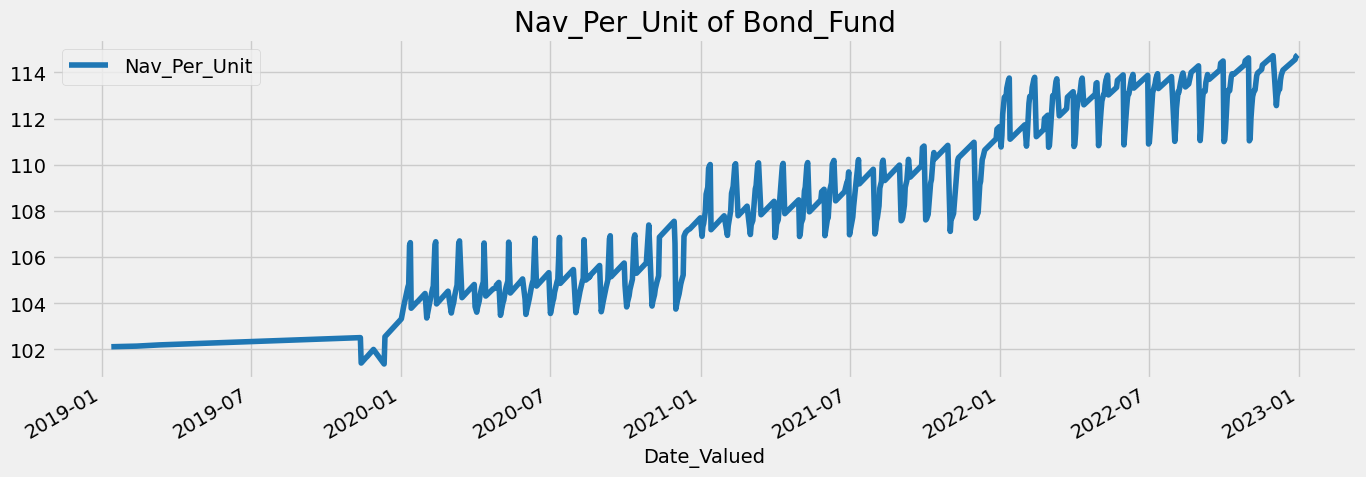

In [18]:
lst=['Umoja_Fund', 'Wekeza_Maisha_Fund', 'Watoto_Fund', 'Jikimu_Fund',
       'Liquid_Fund', 'Bond_Fund']
for item in range(len(lst)):
    temp=df[df['Scheme_Name']==lst[item]]
    temp=temp.drop(['Scheme_Name','Net_Asset_Value','Outstanding_Number_of_Units','Sale_Price_per_Unit','Repurchase_Price/Unit'],
                 axis=1)
    temp=temp.set_index('Date_Valued')
    temp = temp.sort_index(ascending=False)
    temp=temp.drop_duplicates()

    temp.plot(kind='line',
            figsize=(15, 5),
            color=color_pal[0],
            title=f'Nav_Per_Unit of {lst[item]}')
    plt.show()

In [12]:
data = pd.read_csv('Clean_Nav.csv')
data

,Scheme Name,NAV,Units,Sale Price/Unit,Repurchase Price/Unit,Date Valued,Year
0,Umoja Fund,3.022917e+11,3.446718e+08,877.0422,868.2718,2022-12-30,2022
1,Wekeza Maisha Fund,6.658728e+09,8.978248e+06,741.6512,726.8182,2022-12-30,2022
2,Watoto Fund,8.426930e+09,1.537832e+07,547.9748,542.4951,2022-12-30,2022
3,Jikimu Fund,1.912265e+10,1.201808e+08,159.1157,155.9333,2022-12-30,2022
4,Liquid Fund,5.592721e+11,1.632829e+09,342.5173,342.5173,2022-12-30,2022
...,...,...,...,...,...,...,...
9083,Liquid Fund,8.372913e+09,5.353870e+07,156.3899,156.3899,2017-03-01,2017
9084,Umoja Fund,2.105998e+11,4.377620e+08,481.0827,476.2719,2017-02-01,2017
9085,Wekeza Maisha Fund,3.674945e+09,1.163399e+07,315.8799,309.5623,2017-02-01,2017
9086,Watoto Fund,3.309162e+09,1.174273e+07,281.8052,278.9871,2017-02-01,2017


In [13]:
list(data.columns)  

['Scheme Name',
 'NAV',
 'Units',
 'Sale Price/Unit',
 'Repurchase Price/Unit',
 'Date Valued',
 'Year']

# Feature Engineering

In [4]:
data = data.drop('Year', axis=1)

data.shape 

(9088, 6)

In [5]:
# convert categorical features to numerical features


categorical_features = ['Scheme Name']

# One Hot Encoding conversion
data = pd.get_dummies(data, prefix_sep='_', columns = categorical_features)


#show the shape of the data
data.shape

(9088, 11)

In [6]:
list(data.columns)

['NAV',
 'Units',
 'Sale Price/Unit',
 'Repurchase Price/Unit',
 'Date Valued',
 'Scheme Name_Bond Fund',
 'Scheme Name_Jikimu Fund',
 'Scheme Name_Liquid Fund',
 'Scheme Name_Umoja Fund',
 'Scheme Name_Watoto Fund',
 'Scheme Name_Wekeza Maisha Fund']

In [7]:
data.head()

,NAV,Units,Sale Price/Unit,Repurchase Price/Unit,Date Valued,Scheme Name_Bond Fund,Scheme Name_Jikimu Fund,Scheme Name_Liquid Fund,Scheme Name_Umoja Fund,Scheme Name_Watoto Fund,Scheme Name_Wekeza Maisha Fund
0,3.022917e+11,3.446718e+08,877.0422,868.2718,2022-12-30,0,0,0,1,0,0
1,6.658728e+09,8.978248e+06,741.6512,726.8182,2022-12-30,0,0,0,0,0,1
2,8.426930e+09,1.537832e+07,547.9748,542.4951,2022-12-30,0,0,0,0,1,0
3,1.912265e+10,1.201808e+08,159.1157,155.9333,2022-12-30,0,1,0,0,0,0
4,5.592721e+11,1.632829e+09,342.5173,342.5173,2022-12-30,0,0,1,0,0,0


In [8]:
# import MinMaxScaler
# from sklearn.preprocessing import MinMaxScaler


# # feature scalling by using minmaxscaler method 
# scaler = MinMaxScaler(feature_range=(0, 1))


# data['Repurchase Price/Unit'] = scaler.fit_transform(data['Repurchase Price/Unit'].values.reshape(-1,1))
# data['Sale Price/Unit'] = scaler.fit_transform(data['Sale Price/Unit'].values.reshape(-1,1))
# data['NAV'] = scaler.fit_transform(data['NAV'].values.reshape(-1,1))
# data['Units'] = scaler.fit_transform(data['Units'].values.reshape(-1,1))

data.head()

,NAV,Units,Sale Price/Unit,Repurchase Price/Unit,Date Valued,Scheme Name_Bond Fund,Scheme Name_Jikimu Fund,Scheme Name_Liquid Fund,Scheme Name_Umoja Fund,Scheme Name_Watoto Fund,Scheme Name_Wekeza Maisha Fund
0,3.022917e+11,3.446718e+08,877.0422,868.2718,2022-12-30,0,0,0,1,0,0
1,6.658728e+09,8.978248e+06,741.6512,726.8182,2022-12-30,0,0,0,0,0,1
2,8.426930e+09,1.537832e+07,547.9748,542.4951,2022-12-30,0,0,0,0,1,0
3,1.912265e+10,1.201808e+08,159.1157,155.9333,2022-12-30,0,1,0,0,0,0
4,5.592721e+11,1.632829e+09,342.5173,342.5173,2022-12-30,0,0,1,0,0,0


In [9]:
data.to_csv('test.csv')

# Fearure Selection

In [10]:
# import packages 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [11]:
#split dataset into features and target
target = data['Units']
features = data.drop('NAV', axis =1)
features = data.drop('Units', axis =1)
features = data.drop('Date Valued', axis =1)


In [ ]:
#import package 
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

In [ ]:
#create model for training 
model = ExtraTreesClassifier()
model.fit(features,target)

#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_) 

#plot graph of feature importances for better visualization
feature_importances = pd.Series(model.feature_importances_, index=features.columns)

# show the first 30 important features 

fig= plt.figure(figsize=(25,25))
sns.set(font_scale = 3)
feature_importances.nlargest(30).plot(kind='barh')
plt.show() 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#get correlations of each features in dataset
plt.figure(figsize=(30,30))

#plot heat map
sns.set(font_scale = 3)
# to show number set annot=True
d = sns.heatmap(data.corr(),annot=False, cmap="RdYlGn")

#save the figure 
figure = d.get_figure()
figure.savefig("heatmap_output.png")

# show the heatamp graph 
d   

In [13]:
data.head()

,NAV,Units,Sale Price/Unit,Repurchase Price/Unit,Date Valued,Scheme Name_Bond Fund,Scheme Name_Jikimu Fund,Scheme Name_Liquid Fund,Scheme Name_Umoja Fund,Scheme Name_Watoto Fund,Scheme Name_Wekeza Maisha Fund
0,3.022917e+11,3.446718e+08,877.0422,868.2718,2022-12-30,0,0,0,1,0,0
1,6.658728e+09,8.978248e+06,741.6512,726.8182,2022-12-30,0,0,0,0,0,1
2,8.426930e+09,1.537832e+07,547.9748,542.4951,2022-12-30,0,0,0,0,1,0
3,1.912265e+10,1.201808e+08,159.1157,155.9333,2022-12-30,0,1,0,0,0,0
4,5.592721e+11,1.632829e+09,342.5173,342.5173,2022-12-30,0,0,1,0,0,0
